In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
aczone = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_2조/Data/통합 다발지역.csv', index_col=False)
sczone = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_2조/Data/스쿨존 지정건수.csv', index_col=False)
iczone = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_2조/Data/단속카메라(16~20).csv', index_col=False)

In [ ]:
sczone['행정구역']

0      종로구
1      종로구
2      종로구
3       중구
4       중구
      ... 
180    강동구
181    강동구
182    강동구
183    강동구
184    강동구
Name: 행정구역, Length: 185, dtype: object

In [ ]:
new_aczone = aczone.groupby(by=['행정구역', '연도'])['발생건수'].sum()
new_aczone=pd.DataFrame(new_aczone)
new_aczone.reset_index(inplace=True)

In [ ]:
array = np.sort(aczone['행정구역'].unique())

,index,행정구역,연도,발생건수
0,0,강남구,2016,4
1,1,강남구,2018,12
2,2,강남구,2019,3
3,3,강남구,2020,3


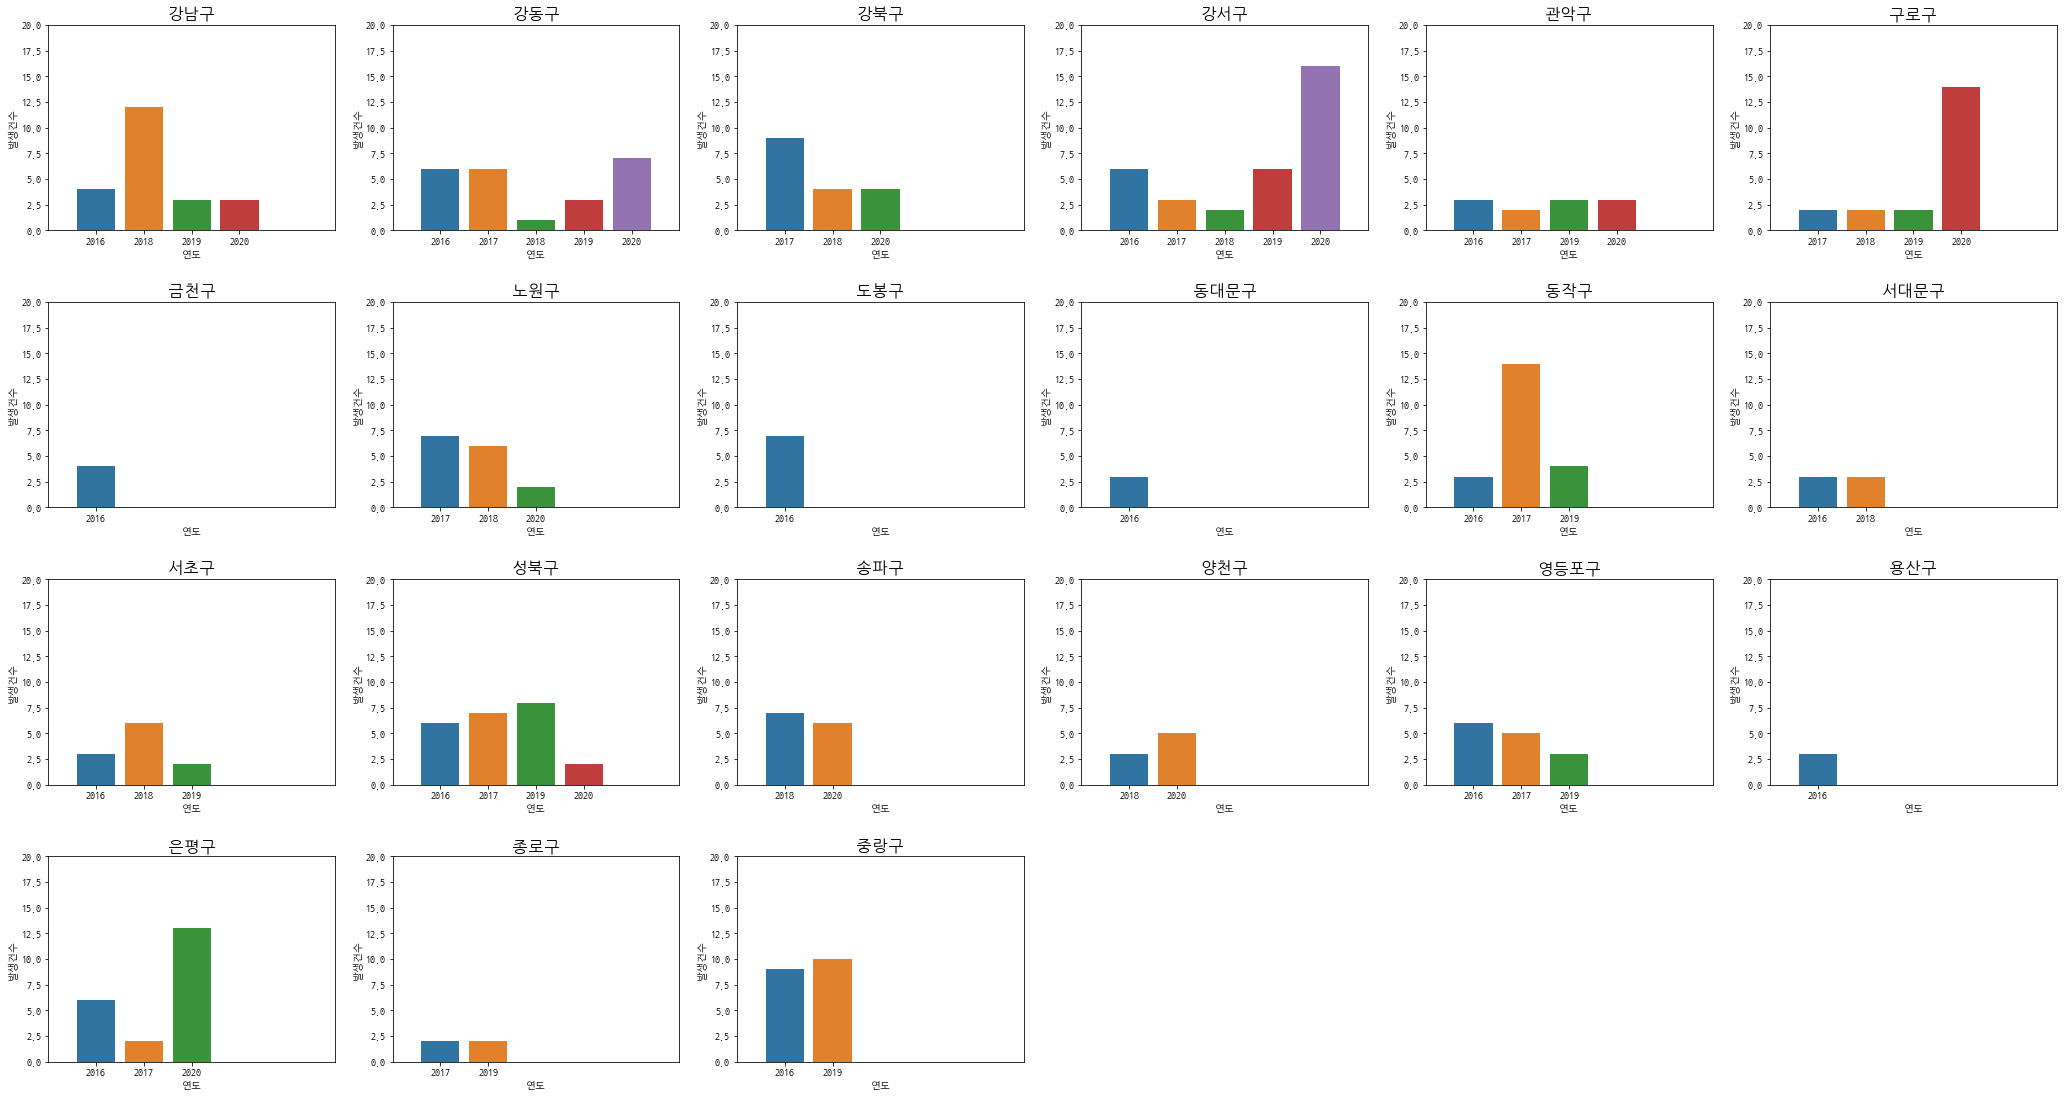

In [ ]:
fig = plt.figure(figsize=[36,18])

for i in range(len(array)):
  plt.subplot(4,6,i+1)
  sns.barplot( data=new_aczone[ new_aczone['행정구역'] == array[i]], x='연도', y='발생건수')
  plt.title(array[i], fontdict={'size':16})
  plt.xticks(rotation = 0)
  plt.xlim([-1,5])
  plt.ylim([0,20])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

In [ ]:
new_sczone = sczone.groupby(by=['행정구역', '연도'])['개수'].sum()
new_sczone=pd.DataFrame(new_sczone)
new_sczone.reset_index(inplace=True)

In [ ]:
array2 = np.sort(sczone['행정구역'].unique())

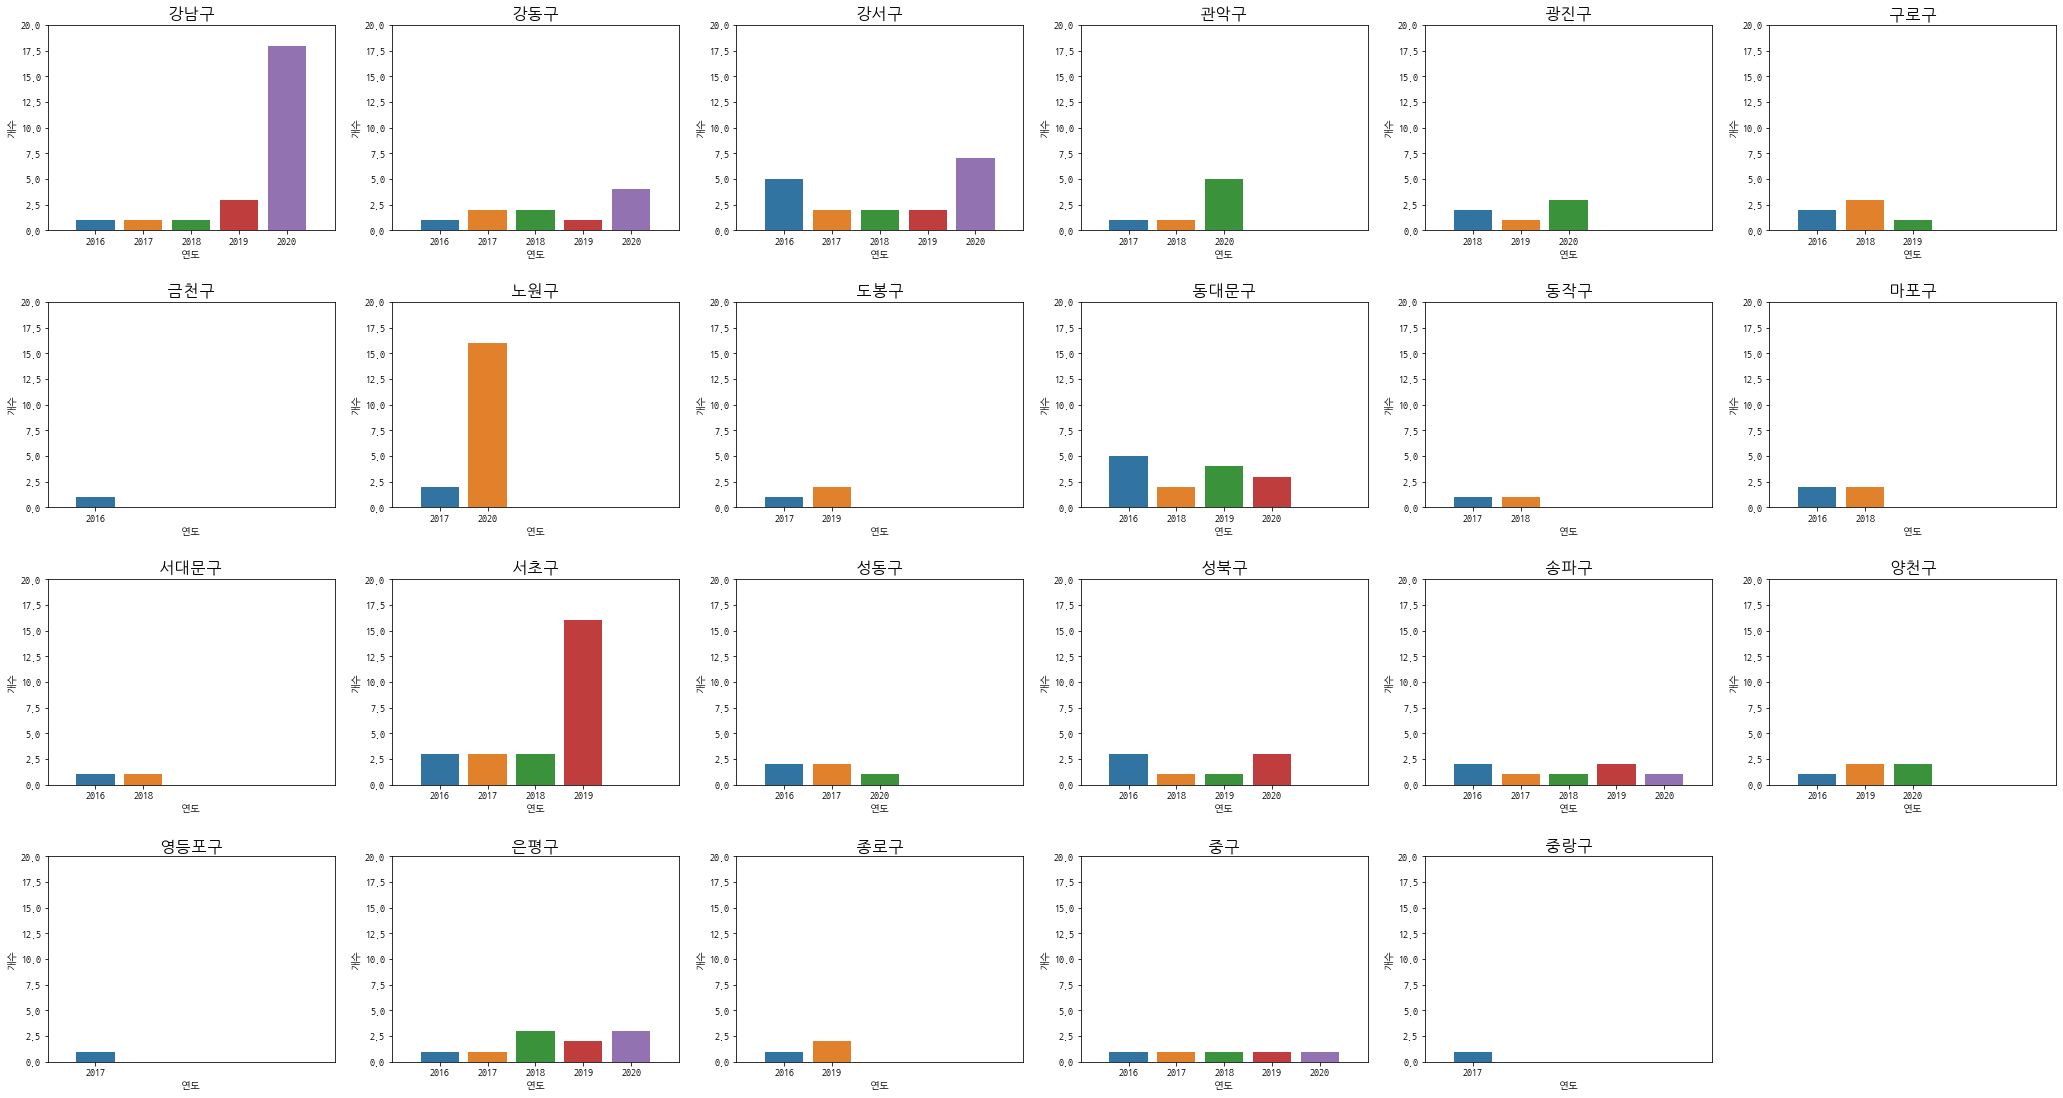

In [ ]:
fig = plt.figure(figsize=[36,18])

for i in range(len(array2)):
  plt.subplot(4,6,i+1)
  sns.barplot( data=new_sczone[new_sczone['행정구역'] == array2[i]], x='연도', y='개수')
  plt.title(array2[i], fontdict={'size':16})
  plt.xticks(rotation = 0)
  plt.xlim([-1,5])
  plt.ylim([0,20])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

In [ ]:
iczone['개수']=1
new_iczone = iczone.groupby(by=['시군구명', '설치연도'])['개수'].sum()
new_iczone=pd.DataFrame(new_iczone)
new_iczone.reset_index(inplace=True)
new_iczone

In [ ]:
array3 = new_iczone['시군구명'].unique()
len(array3)

25

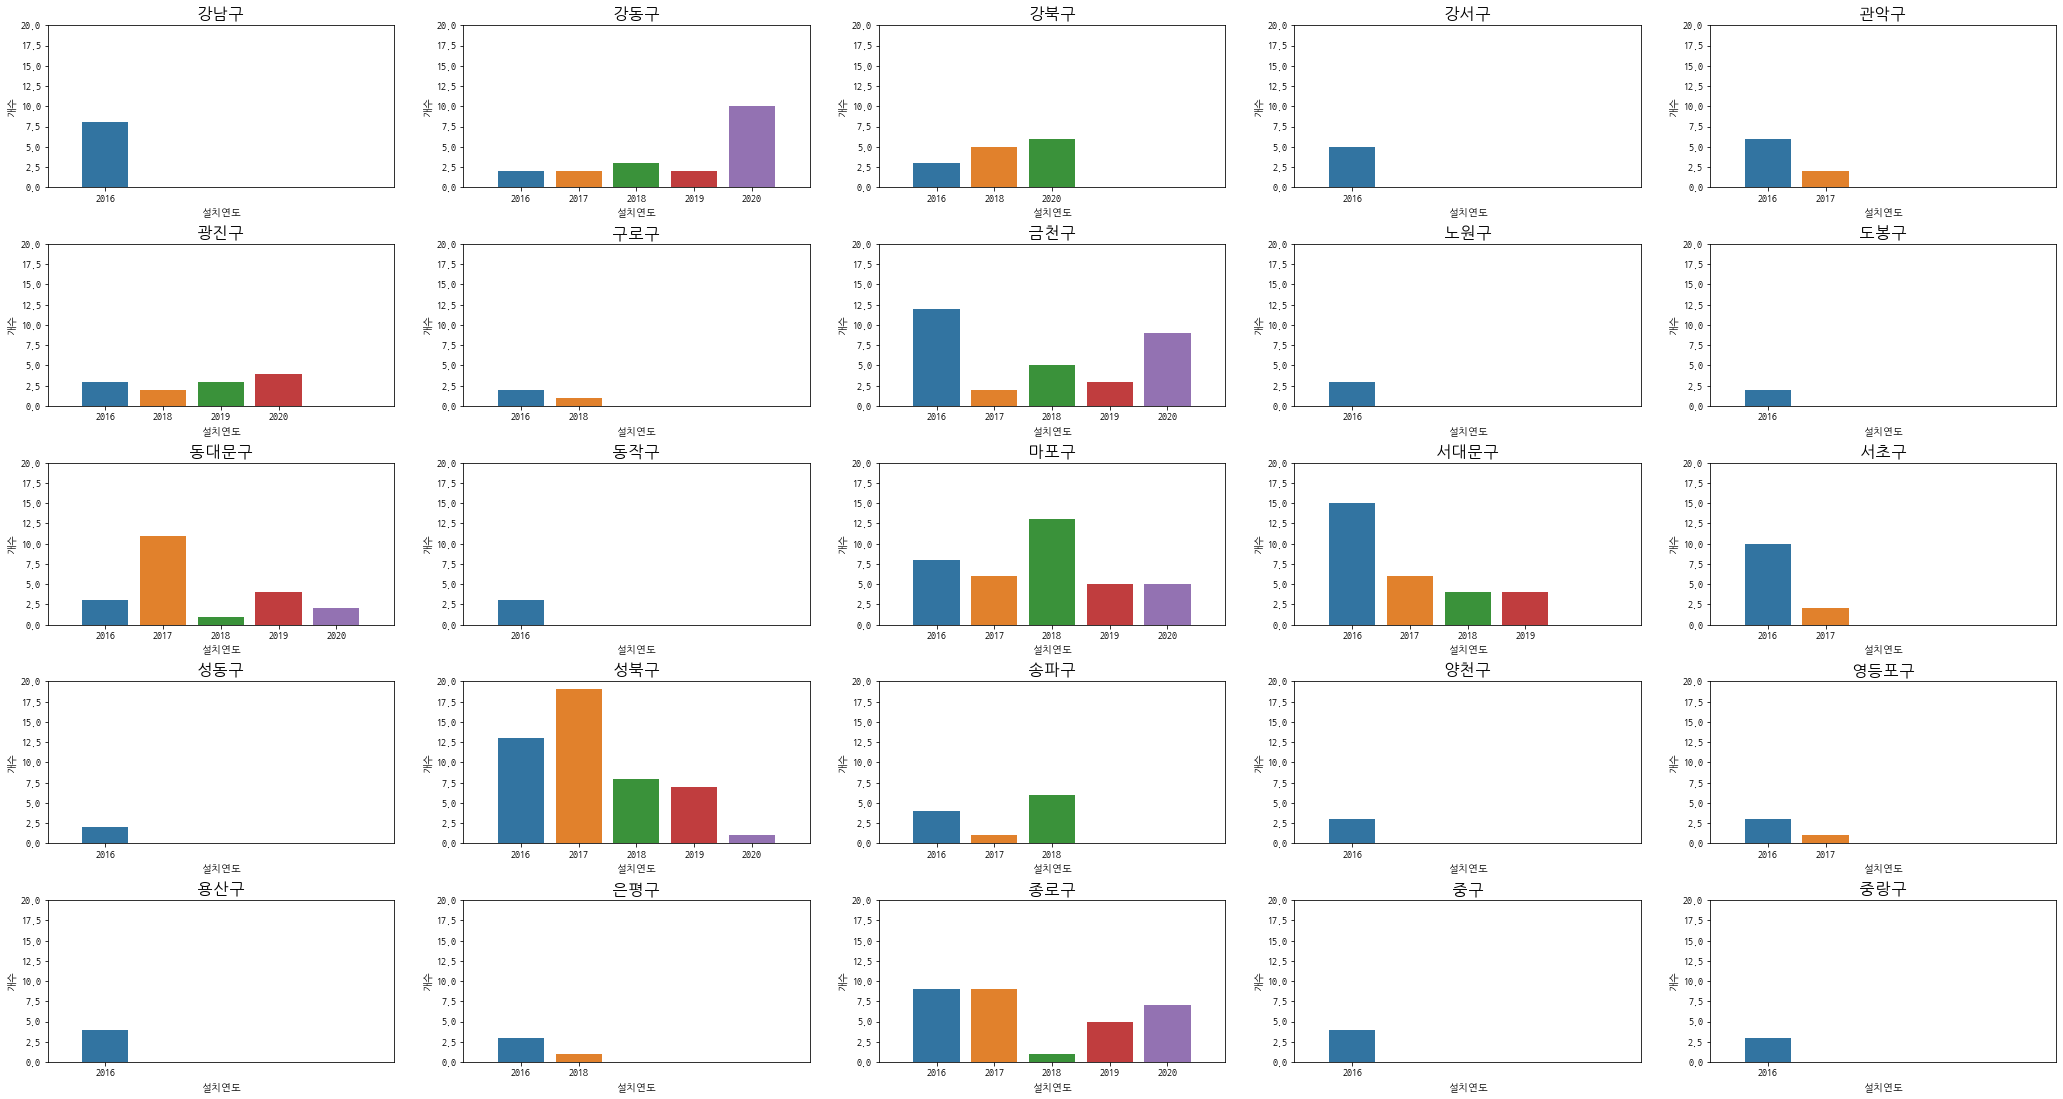

In [ ]:
fig = plt.figure(figsize=[36,18])

for i in range(len(array3)):
  plt.subplot(5,5,i+1)
  sns.barplot( data=new_iczone[new_iczone['시군구명'] == array3[i]], x='설치연도', y='개수')
  plt.title(array3[i], fontdict={'size':16})
  plt.xticks(rotation = 0)
  plt.xlim([-1,5])
  plt.ylim([0,20])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

In [ ]:
array = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구',
         '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

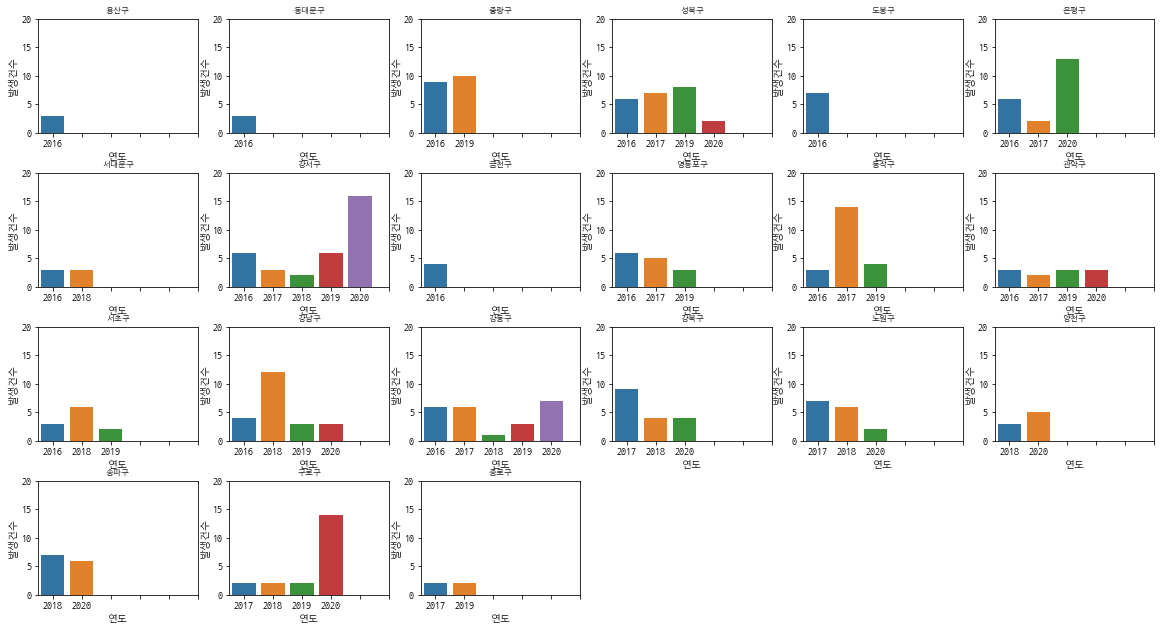

In [ ]:
fig = plt.figure(figsize=[20,10])

for i in range(len(aczone['행정구역'].unique())):
  plt.subplot(4,6,i+1)
  sns.barplot( data=new_aczone[ new_aczone['행정구역'] == aczone['행정구역'].unique()[i]], x='연도', y='발생건수')
  plt.title(aczone['행정구역'].unique()[i], fontdict={'size':8})
  plt.xticks(ticks=[0, 1, 2, 3, 4, 5], rotation = 0)
  ax.set_xticklabels([“2016,”2017,”2018,”2019”,2020”])
  plt.ylim([0,20])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

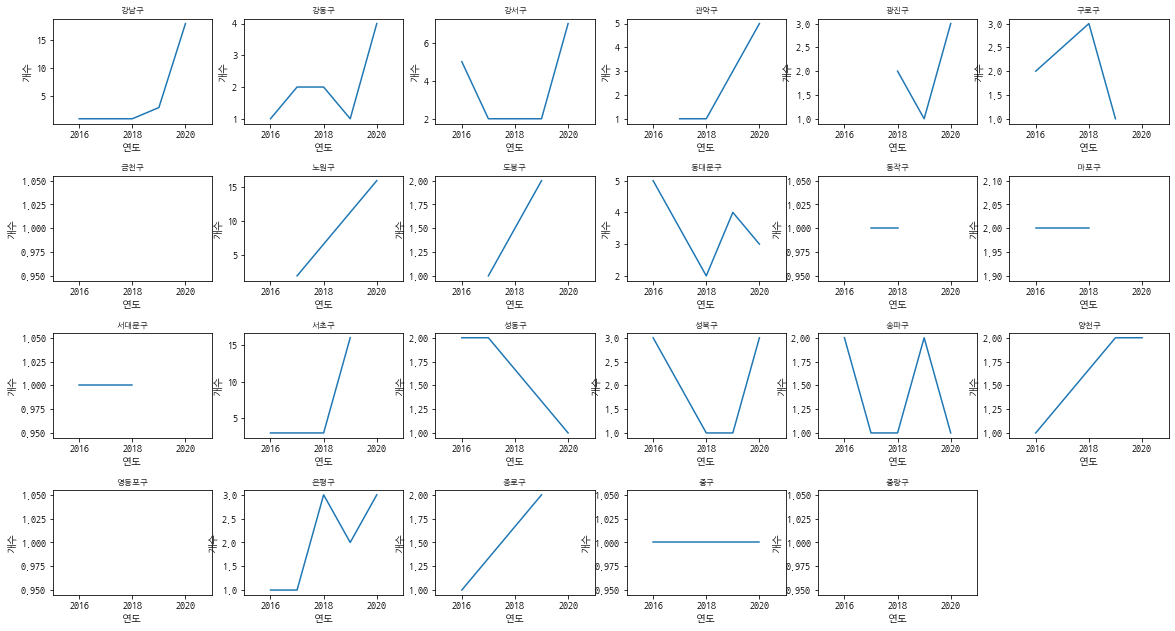

In [ ]:
fig = plt.figure(figsize=[20,10])
array2 = new_sczone['행정구역'].unique()
for i in range(len(array2)):
  plt.subplot(4,6,i+1)
  sns.lineplot(x='연도', y='개수', data=new_sczone[new_sczone['행정구역']==array2[i]])
  plt.title(new_sczone['행정구역'].unique()[i], fontdict={'size':8})
  plt.xticks(rotation = 0)
  plt.xlim([2015,2021])
  # plt.ylim([0,20])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

In [ ]:
  new_sczone[new_sczone['행정구역']=='영등포구']

,행정구역,연도,개수
58,영등포구,2017,1


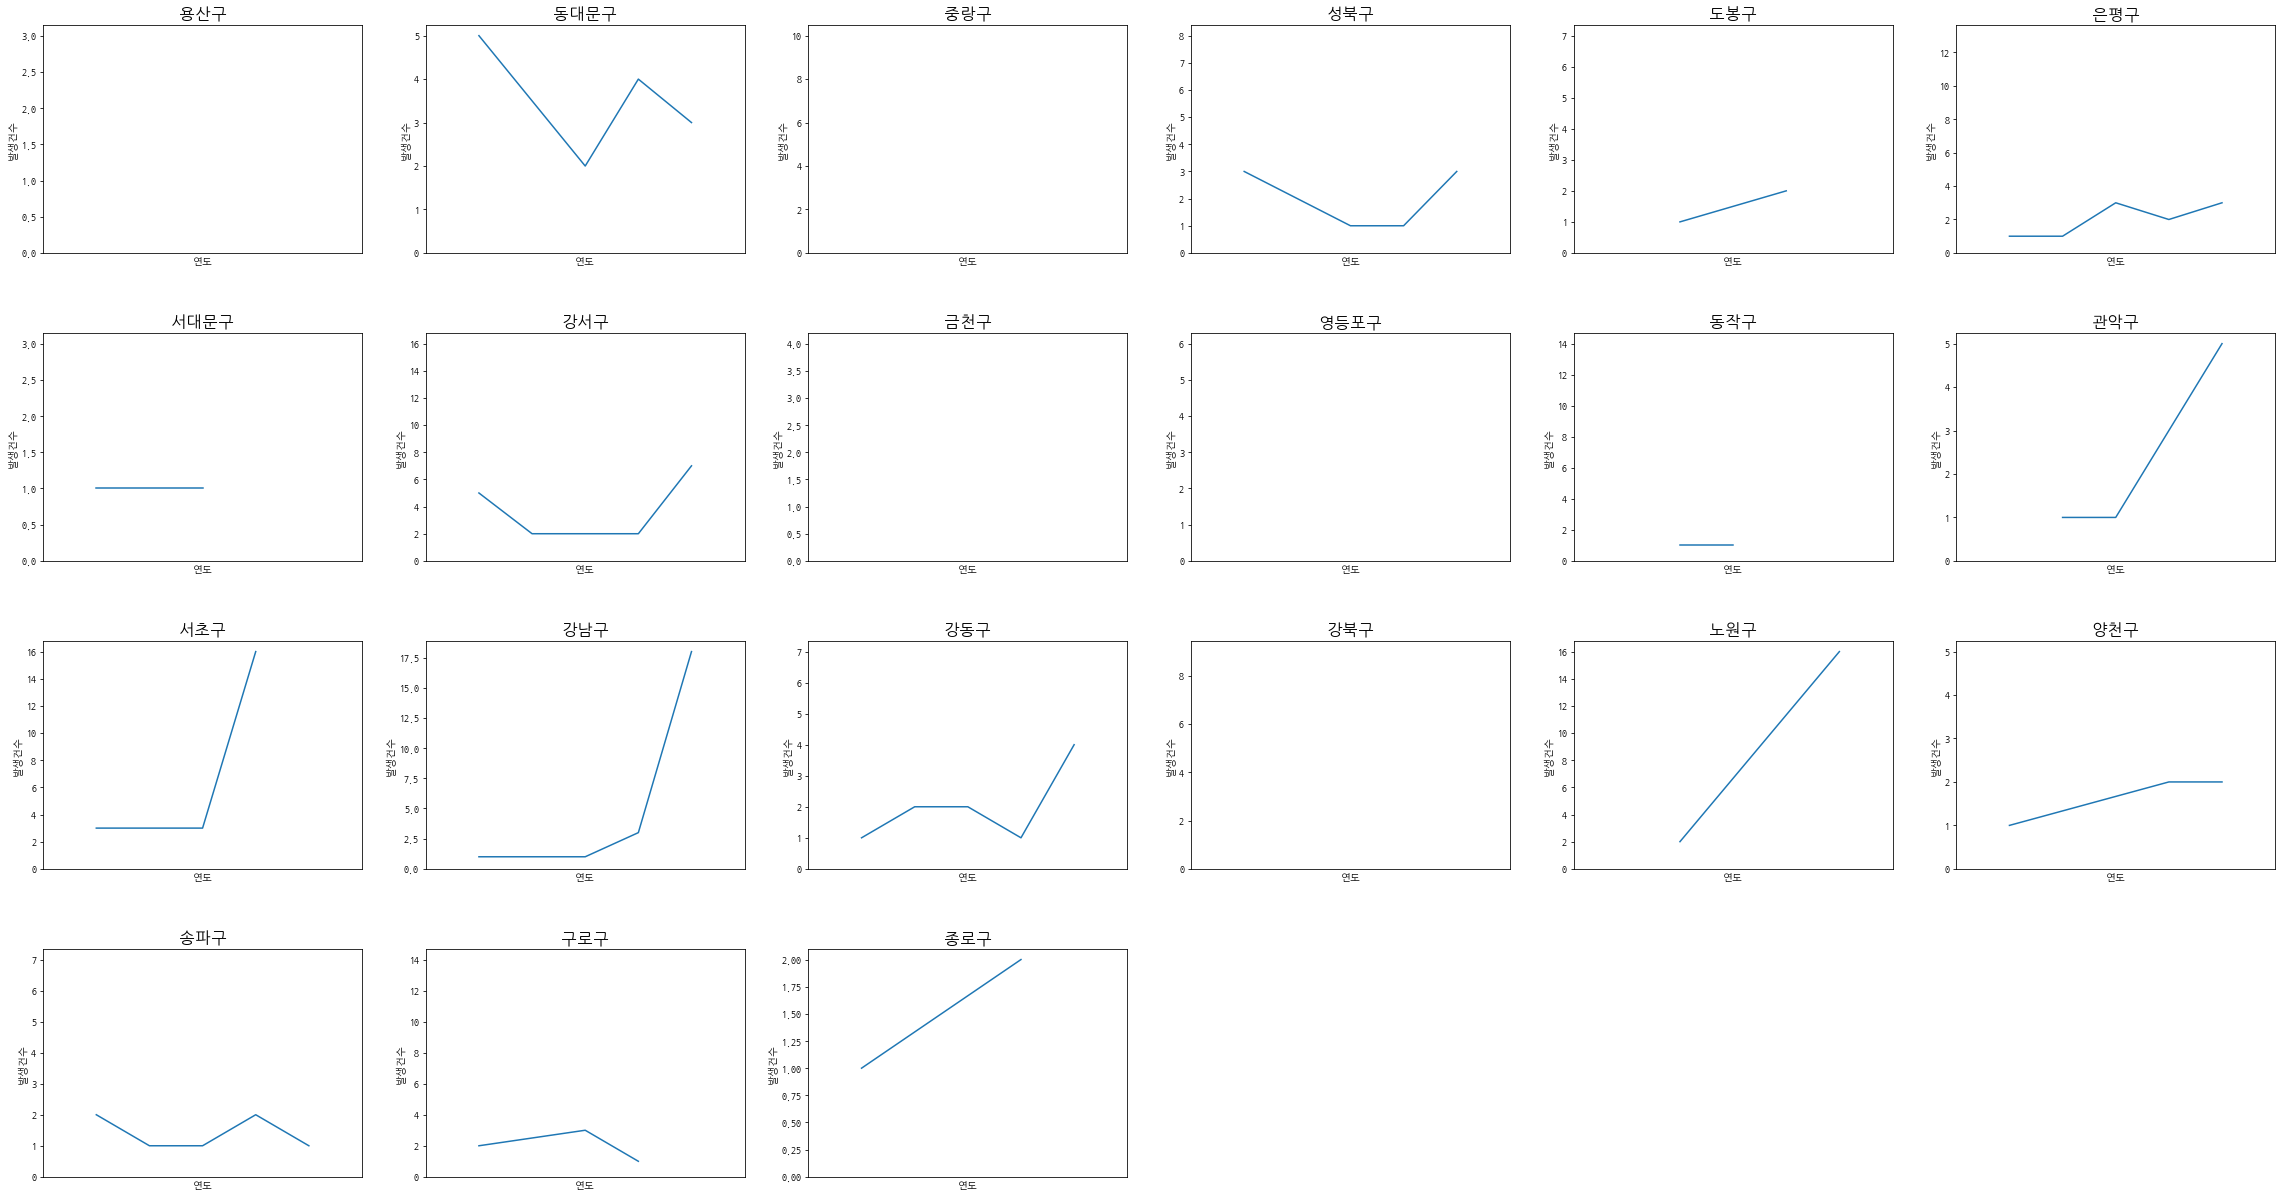

In [ ]:
fig = plt.figure(figsize=[40,20])

for i in range(len(array)):
  plt.subplot(4,6,i+1)
  sns.barplot( data=new_aczone[ new_aczone['행정구역'] == array[i]], x='연도', y='발생건수')
  sns.lineplot(x='연도', y='개수', data=new_sczone[new_sczone['행정구역']==array[i]])
  plt.title(aczone['행정구역'].unique()[i], fontdict={'size':16})
  plt.xticks(rotation = 0)
  plt.xlim([2015,2021])
  # plt.ylim([0,20])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)